In [14]:
import cv2  
import numpy as np 
from PIL import ImageFilter 
from PIL import Image
from IPython.display import clear_output
import matplotlib.pyplot as plt
import random
import imutils
from os import listdir
import os


#%run /home/souhila/Diatoms/variables.ipynb
#DATASET_PATH = '/home/souhila/nvme-storage/RA_V2/tmp'



def flou_cercle( path ,alpha=10 ):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = img.shape

    # Define mask 
    mask = 255*np.ones(img.shape, dtype='uint8') 

    # Draw circle at x = int(w/2), y = int(h/2) of radius 25 and fill this in with 0 
    mask = cv2.circle(mask, ( int(w/2), int(h/2)), 50, color = 0, thickness = -1)  

    # Apply distance transform to mask 
    out = cv2.distanceTransform(mask, cv2.DIST_L2, 3) 

    # Define scale factor 
    scale_factor = alpha

    # Create output image that is the same as the original 
    filtered = img.copy() 

    # Create floating point copy for precision 
    img_float = img.copy().astype('float') 


    # For each pixel in the input... 
    for y in range(h): 
        for x in range(w): 

    # If distance transform is 0, skip 
            if out[y,x] == 0.0:
                continue 

            # Calculate M = d/S 
            mask_val = np.ceil(out[y,x]/scale_factor) 

        # If M is too small, set the mask size to the smallest possible value 
            if mask_val <= 3:
                mask_val = 3 

            # Get beginning and ending x and y coordinates for neighbourhood 
            # and ensure they are within bounds 
            beginx = x-int(mask_val/2) 
            if beginx < 0: 
                beginx = 0 

            beginy = y-int(mask_val/2) 
            if beginy < 0: 
                beginy = 0 

            endx = x+int(mask_val/2) 
            if endx >= w: 
                endx= w-1 

            endy = y+int(mask_val/2) 
            if endy >= h: 
                endy = h-1 

            # Get the coordinates of where we need to grab pixels 
            xvals = np.arange(beginx, endx+1) 
            yvals = np.arange(beginy, endy+1) 
            (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
            col_neigh = col_neigh.astype('int') 
            row_neigh = row_neigh.astype('int') 

        # Get the pixels now 
        # For each channel, do the foveation 
            #pix = img_float[row_neigh, col_neigh].ravel() 

     # Calculate the average and set it to be the output 
            filtered[y,x] = int(np.mean(img_float)) 
        
        filtered = filtered[:,:] 
    out2=out.astype(int)
    # Show the image 
    display(Image.fromarray( filtered) )
    display(Image.fromarray( mask) )
    #display(Image.fromarray( out2) )


    return(filtered,out2)

In [15]:
def ImTranslate(h,tau):
    M, N = h.shape
    v = np.zeros((M,N))
    indrow = ((tau[0]+np.arange(M))%M).reshape(M,1)
    indcol = ((tau[1]+np.arange(N))%N).reshape(1,N)
    v[indrow,indcol] = h
    return v

def flou_circle( DATASET_PATH, center, radius, alpha=10 ):
    
    img = Image.open(DATASET_PATH)
    h, w = img.shape
    
    # Define mask 
    mask = 255*np.ones(img.shape, dtype='uint8')
    

    if form == 'circle':
        # Draw circle at x = int(w/2), y = int(h/2) of radius 25 and fill this in with 0 
        mask = cv2.circle(mask, ( int(w/2), int(h/2)), 20, color = 0, thickness = -1) 
        ker2 = cv2.distanceTransform(mask, cv2.DIST_L2, 3)
        
    img_float = img.copy().astype('float') 
    # Create output image that is the same as the original 
    filtered = img.copy()
    
    for y in range(h): 
        for x in range(w): 
    # If distance transform is 0, skip 
            mask_val=np.ceil(ker2[y,x]/10) 
            # Get beginning and ending x and y coordinates for neighbourhood 
            # and ensure they are within bounds 
            beginx = x-int(mask_val/2) 
            if beginx < 0: 
                beginx = 0 

            beginy = y-int(mask_val/2) 
            if beginy < 0: 
                beginy = 0 

            endx = x+int(mask_val/2) 
            if endx >= w: 
                endx= w-1 

            endy = y+int(mask_val/2) 
            if endy >= h: 
                endy = h-1 
                
            # Get the coordinates of where we need to grab pixels 
            xvals = np.arange(beginx, endx+1) 
            yvals = np.arange(beginy, endy+1) 
            (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
            col_neigh = col_neigh.astype('int') 
            row_neigh = row_neigh.astype('int') 

            # Get the pixels now 
            # For each channel, do the foveation 
            
            #pix = img_float[row_neigh, col_neigh].ravel() 

            # Calculate the average and set it to be the output 
            filtered[y,x] = int(np.mean(img_float)) 
            
    return(filtered)

def flou_plane( img, alpha=10 ):
    
    #img = cv2.imread(DATASET_PATH,cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # Define mask 
    mask = 255*np.ones(img.shape, dtype='uint8')
    
    
    
    zstalck =[]
    ss = np.linspace(1,-1,6)
    for s in ss:

        t=np.repeat(np.linspace(-1,1,h),w).reshape(h,w)
        kernel = np.ones((h,w))
        ker = kernel*np.exp((-(t-s)**2-(t-s)**2)/0.2)
        ker2 = abs(np.ceil((ker-np.max(ker))*100))


        img_float = img.copy().astype('float') 
        # Create output image that is the same as the original 
        filtered = img.copy()

        for y in range(h): 
            for x in range(w): 
                mask_val=np.ceil(ker2[y,x]/10) 
                beginx = x-int(mask_val/2) 
                if beginx < 0: 
                    beginx = 0 

                beginy = y-int(mask_val/2) 
                if beginy < 0: 
                    beginy = 0 

                endx = x+int(mask_val/2) 
                if endx >= w: 
                    endx= w-1 

                endy = y+int(mask_val/2) 
                if endy >= h: 
                    endy = h-1 

                xvals = np.arange(beginx, endx+1) 
                yvals = np.arange(beginy, endy+1) 
                (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
                col_neigh = col_neigh.astype('int') 
                row_neigh = row_neigh.astype('int') 

                # Get the pixels now 
                # For each channel, do the foveation 

                #pix = img_float[row_neigh, col_neigh].ravel() 

                # Calculate the average and set it to be the output 
                filtered[y,x] = int(np.mean(img_float[row_neigh, col_neigh])) 

        zstalck.append(filtered)
        
    return(zstalck)

def rot_image_path(path,angle):
    img = Image.open(path)
    #mask = np.zeros_like(img)-1
    
    #rotation mask et image
    mask_rot = np.ones(img.shape,np.uint8)
    
    img_rot = imutils.rotate_bound(img, angle)
    mask_rot = imutils.rotate_bound(mask_rot, angle)
    
    #erosion mask
    mask_erod =np.zeros_like(img_rot,np.uint8)
    kernel_size = 5
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
    
    #pixels erodé
    erod = (mask_rot - mask_erod)*255
    
    #erod_img[erod==255] = img_rot[erod==255]

    fond_moyen = []
    fond_moyen = img_rot[erod!=0]
    fond_moyen = int(np.ma.median(fond_moyen))
    img_rot[mask_erod == 0] = fond_moyen
    #display(Image.fromarray(img_rot))


    return(img_rot)

def rot_image_img(img,angle):
    #img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    #mask = np.zeros_like(img)-1
    
    #rotation mask et image
    mask_rot = np.ones(img.shape,np.uint8)
    
    img_rot = imutils.rotate_bound(img, angle)
    mask_rot = imutils.rotate_bound(mask_rot, angle)
    
    #erosion mask
    mask_erod =np.zeros_like(img_rot,np.uint8)
    kernel_size = 5
    kernel = np.ones((kernel_size,kernel_size),np.uint8)
    mask_erod = cv2.erode(mask_rot,kernel,iterations = 1)
    
    #pixels erodé
    erod = (mask_rot - mask_erod)*255
    
    #erod_img[erod==255] = img_rot[erod==255]

    fond_moyen = []
    fond_moyen = img_rot[erod!=0]
    fond_moyen = int(np.ma.median(fond_moyen))
    img_rot[mask_erod == 0] = fond_moyen
    #display(Image.fromarray(img_rot))


    return(img_rot)

In [8]:
files = [f for f in listdir(DATASET_PATH) if os.path.isfile(os.path.join(DATASET_PATH, f))]
#random.sample
#h,w = img.shape
list_files = random.sample(files,10)
for file in list_files:
    angle = random.randint(0,180)
    img = cv2.imread(os.path.join(DATASET_PATH +'/'+ file))                     
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
   
    img_rot = rot_image_img(img,angle)
    zslack = flou_plane(img_rot,alpha=10 )
    angle = random.randint(0,90)
    print(angle)
    for i in range(6):
        img2 = rot_image_img(zslack[i],angle)
        #cv2.imwrite(os.path.join('/home/souhila/nvme-storage/RA_V2/tmp2/'+file.split('_')[1]+ '_' +str(i) + '.png') , img2)
        

FileNotFoundError: [Errno 2] No such file or directory: '/home/souhila/nvme-storage/RA_V2/tmp'

/mnt/nvme-storage/venv/tf2.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/mnt/nvme-storage/venv/tf2.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/mnt/nvme-storage/venv/tf2.1/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an

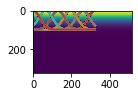

In [3]:
'''
DATASET_PATH = '/home/souhila/nvme-storage/diatoms_3Da.png'
img = cv2.imread(DATASET_PATH)
img=img[:,:,1]
ss = np.linspace(1,-1,6)
h, w = img.shape

for s in ss:
    t=np.repeat(np.linspace(-1,1,h),w).reshape(h,w)
    kernel = np.ones((h,w))
    ker = kernel*np.exp((-(t-s)**2-(t-s)**2)/0.2)
    ker2 = abs(np.ceil((ker-np.max(ker))*100))
    plt.figure(1)
    plt.subplot(231)
    plt.plot(ker2)
    plt.imshow(ker)
    plt.savefig(os.path.join('Z-stacks_'+str(s)+'.png'), transparent = True)

    plt.plot()'''

In [1]:
import cv2  
import numpy as np 
from PIL import ImageFilter 
from PIL import Image
from IPython.display import clear_output
import matplotlib.pyplot as plt
import random
import imutils
from os import listdir
import os


(325, 514)
88


AttributeError: 'tuple' object has no attribute 'shape'

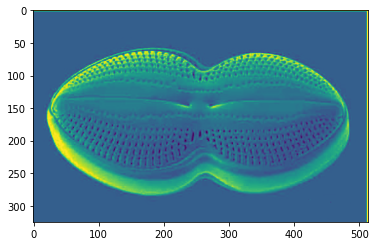

In [13]:

DATASET_PATH = '/home/souhila/nvme-storage/diatoms_3Da.png'
img = cv2.imread(DATASET_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)
plt.imshow(img)
angle = random.randint(0,180)
print(angle)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rot = rot_image_img(img,angle)
zstalck = flou_plane(img_rot,alpha=10 )
angle = random.randint(0,90)
print(angle)

for i in range(6):
    img2 = rot_image_img(zstalck[i],angle)
    cv2.imwrite(os.path.join('/home/souhila/nvme-storage/tmp'+ '_' +str(i) + '.png') , img2)

In [11]:
def flou_plane( img, alpha=10 ):
    
    #img = cv2.imread(DATASET_PATH,cv2.COLOR_BGR2GRAY)
    h, w = img.shape
    
    # Define mask 
    mask = 255*np.ones(img.shape, dtype='uint8')
    
    
    
    zstalck =[]
    ss = np.linspace(1,-1,6)
    for s in ss:

        t=np.repeat(np.linspace(-1,1,h),w).reshape(h,w)
        kernel = np.ones((h,w))
        ker = kernel*np.exp((-(t-s)**2-(t-s)**2)/0.2)
        ker2 = abs(np.ceil((ker-np.max(ker))*100))


        img_float = img.copy().astype('float') 
        # Create output image that is the same as the original 
        filtered = img.copy()

        for y in range(h): 
            for x in range(w): 
                mask_val=np.ceil(ker2[y,x]/10) 
                beginx = x-int(mask_val/2) 
                if beginx < 0: 
                    beginx = 0 

                beginy = y-int(mask_val/2) 
                if beginy < 0: 
                    beginy = 0 

                endx = x+int(mask_val/2) 
                if endx >= w: 
                    endx= w-1 

                endy = y+int(mask_val/2) 
                if endy >= h: 
                    endy = h-1 

                xvals = np.arange(beginx, endx+1) 
                yvals = np.arange(beginy, endy+1) 
                (col_neigh,row_neigh) = np.meshgrid(xvals, yvals) 
                col_neigh = col_neigh.astype('int') 
                row_neigh = row_neigh.astype('int') 

                # Get the pixels now 
                # For each channel, do the foveation 

                #pix = img_float[row_neigh, col_neigh].ravel() 

                # Calculate the average and set it to be the output 
                filtered[y,x] = int(np.mean(img_float)) 

        zstalck.append(filtered)
        
    return(zstalck)


In [18]:

h, w = img.shape
mask = 255*np.ones(img.shape, dtype='uint8')

(80, 240)

In [ ]:
DATASET_PATH = '/home/souhila/nvme-storage/diatoms_3Da.png'
img = cv2.imread(DATASET_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
a = flou_plane( img, alpha=10 )
plt.imshow(a[1])

In [11]:

angle = random.randint(0,180)
#img, mask_rot, mask_erod, fond_moyen = rot_image_path(DATASET_PATH,angle)
img_rot = rot_image_img(img,angle)
zstalck = flou_plane(img_rot,alpha=10 )
angle = random.randint(0,90)
print(angle)
fig=plt.figure(figsize=(18, 18)) 
columns = 2 
rows = 3
for i in range(6):
    img2 = rot_image_img(zstalck[i],angle)
    #cv2.imwrite(join('/home/souhila/nvme-storage/RA_V2/tmp2/'+'RA_AAMB_0012'+ '_' +str(i) + '.png') , img2)
    print(type(img2[0,0]))
    '''fig.add_subplot(rows, columns, i+1) 
    plt.imshow(img2) 
plt.show() 

'''

84
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>


<Figure size 1296x1296 with 0 Axes>

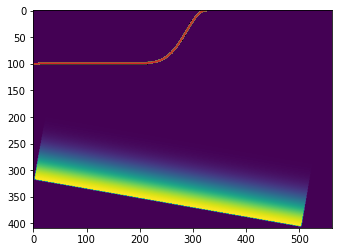

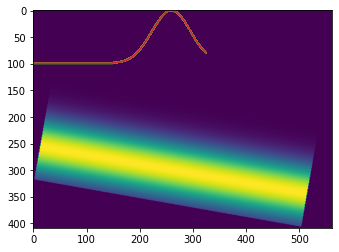

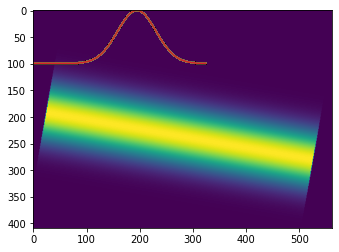

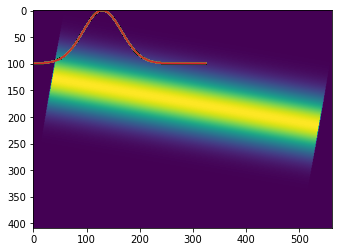

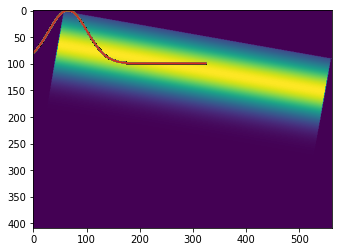

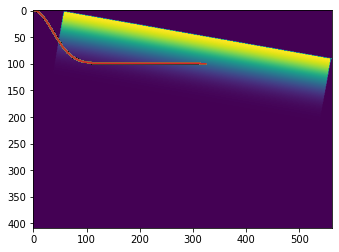

In [8]:
ss = np.linspace(1,-1,6)
h, w = img.shape
for s in ss:
    
    t=np.repeat(np.linspace(-1,1,h),w).reshape(h,w)
    kernel = np.ones((h,w))
    ker = kernel*np.exp((-(t-s)**2-(t-s)**2)/0.2)
    ker1 = rot_image_img(ker,10)
    plt.imshow(ker1)
    ker2 = abs(np.ceil((ker-np.max(ker))*100))
    for i in range(6):
        p = plt.plot(ker2)
    plt.savefig(os.path.join('Z-stacks_'+str(s)+'.png'), transparent = True)

    plt.show()
